In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_y = pd.DataFrame(datasets.load_iris().target)

In [4]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


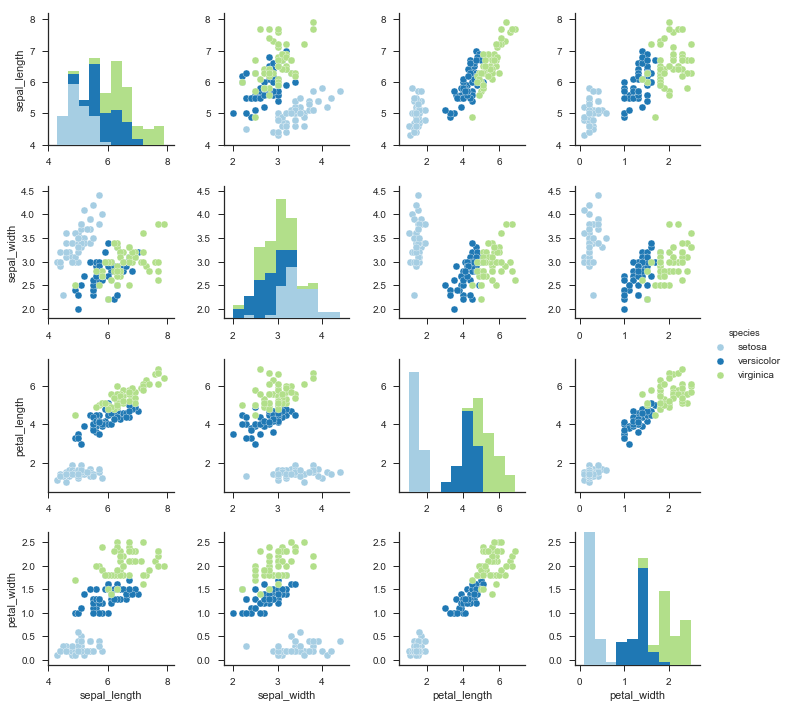

In [5]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
graph = sns.pairplot(sns.load_dataset("iris"), hue="species", palette="Paired")

In [7]:
from sklearn.cross_validation import train_test_split

x = iris.drop(['sepal length (cm)', 'petal width (cm)'], axis=1)
y = np.array(datasets.load_iris().target)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1990)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [9]:
k_temp = list(range(1,40))
accuracy = []
for k in k_temp:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, pred))

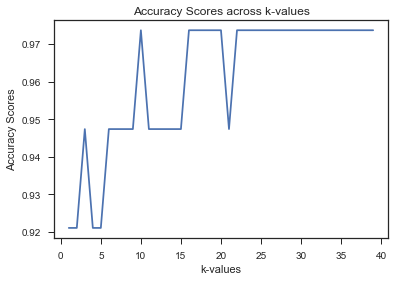

In [10]:
plt.plot(k_temp, accuracy)
plt.xlabel('k-values')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores across k-values')
plt.show()

In [11]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
projected = knn.predict(x_test)
print(metrics.accuracy_score(y_test, projected))

0.921052631579


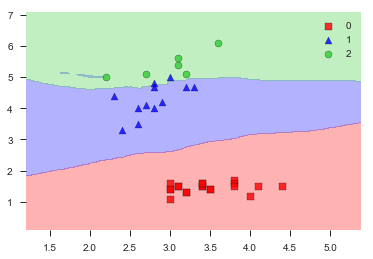

In [12]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(x_test), y_test, knn)